# Esonero 2 - 17 Maggio 2021

Completare i seguenti esercizi tramite uno o più blocchi di codice descrivendo le operazioni effettuate


# Esercizio 1

Data la seguente immagine, costruire la feature pyramid di gaussiane e descrivere il procedimento

![](figure1.jpg)

In [24]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import image as mp_image
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
from scipy.ndimage import convolve, correlate, filters
from scipy import misc, ndimage


img_src = './data/'


def img_show(image, **argv):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, **argv)  # display the image
    plt.axis('off')
    plt.show()


def img_info(image):
    print(image.shape, image.dtype, type(image))


def get_contrast(img):
    return np.max(img * 255) - np.min(img * 255)


def base_stats(img):
    return "Contrasto: {0:.0f} (valore massimo: {1:.0f}; valore minimo: {2:.0f})".format(get_contrast(img),
                                                                                         np.max(img * 255),
                                                                                         np.min(img * 255))


def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.2989, 0.5870, 0.1140])


def normalize(img):
    return (img - np.min(img)) / (np.max(img) - np.min(img))


In [25]:
from utils import *
import numpy.linalg as LA
img_src = '.'

In [15]:
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt

%matplotlib inline

Shape (1200, 1920)


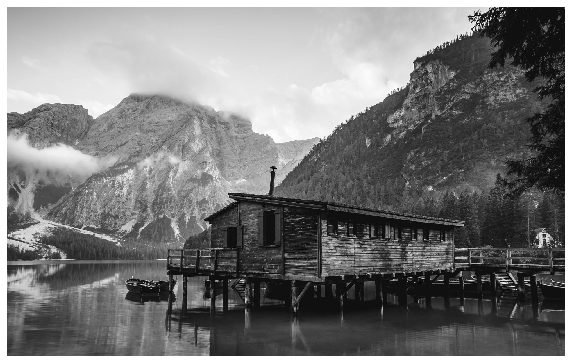

In [26]:
imageFull = mp_image.imread(os.path.join(img_src,'figure1.jpg'))

image = rgb2gray(imageFull)

maxv, minv = np.max(image), np.min(image)

image = (image - minv)/(maxv-minv)

print('Shape', image.shape)
img_show(image,cmap=cm.gray)

Shape (1200, 1920)


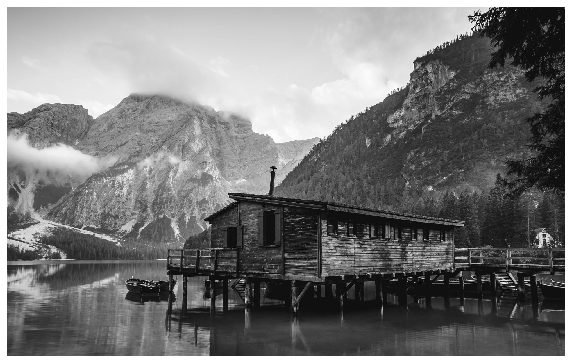

In [27]:
imageFull = mp_image.imread(os.path.join(img_src,'figure1.jpg'))

image = rgb2gray(imageFull)

maxv, minv = np.max(image), np.min(image)

image = (image - minv)/(maxv-minv)

print('Shape', image.shape)
img_show(image,cmap=cm.gray)

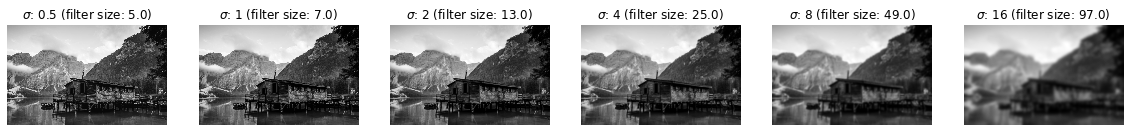

In [28]:
fig = plt.figure(figsize=(20, 20))

num_octave = 6

for i in range(num_octave):
    sigma = 2**(i-1)
    fig.add_subplot(1, num_octave, i+1) 
    plt.imshow(ndimage.gaussian_filter(image,sigma),cmap=cm.gray)
    s = 2*np.ceil(3*sigma)+1
    plt.title(f'$\sigma$: {sigma} (filter size: {s})')
    plt.axis('off')

plt.show()

l'applicando il filtro si va a simulare la perdita di dettagli mentre la scala dell'immagine decrescesse progressivamente.

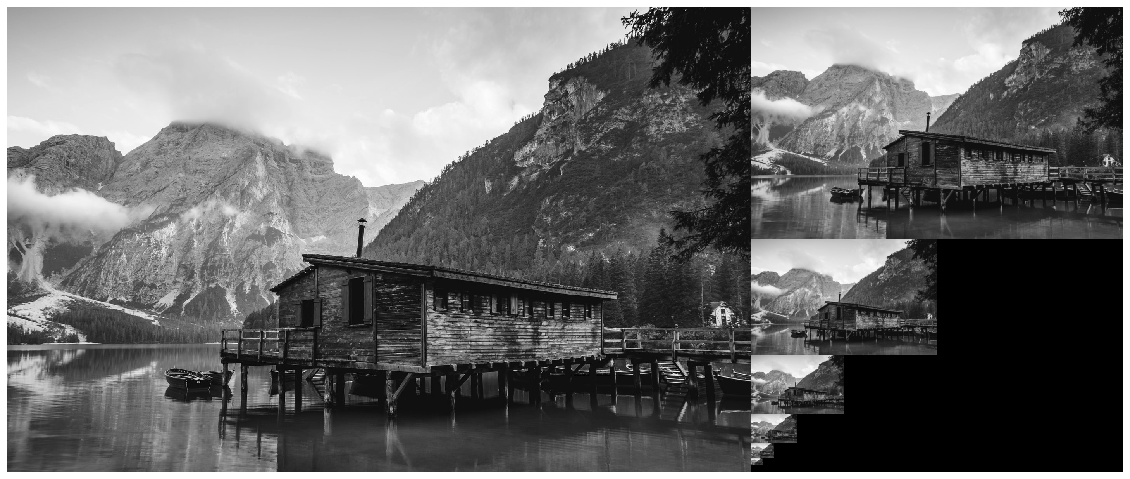

In [29]:
rows,cols = image.shape

output = np.zeros((rows,cols+cols//2))

output[:rows,:cols] = image

num_octave = 6

cur_scale = image

horiz = True
rows = 0

for i in range(num_octave):
    sigma = 2**i
    cur_scale = ndimage.gaussian_filter(image,sigma)
    cur_scale = cur_scale[::2**(i+1),::2**(i+1)]
    rows_scaled, cols_scaled = cur_scale.shape
    output[rows:rows+rows_scaled,cols:cols+cols_scaled] = cur_scale
    rows += rows_scaled
        
        
plt.figure(figsize=(20, 20))

plt.imshow(output,cmap=cm.gray)
plt.axis('off')
plt.show()

a destra abbiamo le riduzioni dell'immagine mentre il focus dell'imamgine rimane ovvero ne rimangono i dettagli

# Esercizio 2


Data la seguente sequenza di tensori e la funzione *f*, calcolare il gradiente per i tensori a,b,c,d,e,y. 

Descrivere come viene costruito il grafo di computazione mostrando quali operazioni vengono effettuate, cioè calcolando le derivate parziali in maniera esplicita. 

$
y = f(a,b,c,d,e) = \sum \frac {1 + a^3 + \exp(b^5) * \sin (c*d)} {3e}
$

*non sono necessarie librerie esterne*

In [44]:
a = torch.tensor([5, 6, 7, 8, 1, 2], dtype=torch.float, requires_grad=True).view(3, 2)
b = torch.tensor([3, 3, 0, 1, 6, 2], dtype=torch.float, requires_grad=True).view(3, 2)
c = torch.tensor([1, 5, 0, 7, 4, 3], dtype=torch.float, requires_grad=True).view(3, 2)
d = torch.tensor([2, 6, 3, 8, 3, 1], dtype=torch.float, requires_grad=True).view(3, 2)
e = torch.tensor([5, 2, 1, 1, 1, 1], dtype=torch.float, requires_grad=True).view(3, 2)



In [ ]:
#i tensori a,b,c,d,e sono stati istanziati con 
#requires_grad=true, quindi il tensore in questione deve essere una costante?
#se passo true significa che posso calcolare la derivata di questa funzione rispetto ad x

In [48]:

m1= torch.pow(a,3)
m1.retain_grad() #con questa funzione calcolo la derivata parziale
m2= torch.pow(b,2)
m2.retain_grad()
m22= torch.exp(m2)
m22.retain_grad()
cd= c*d
cd.retain_grad()
m3 = torch.cos(cd)
m3.retain_grad()
m3fin=m22*m3
m3fin.retain_grad()
numer = m1 + m3fin
numer.retain_grad()
denom= 3*e
denom.retain_grad()
numdem = numer/denom
numdem.retain_grad()
y=torch.sum(numdem)
print(y)
y.backward()


tensor(1.2127e+15, grad_fn=<SumBackward0>)


# Esercizio 3

Dati due batch A e B, mostrare gli effetti della BN.

Suggerimento: calcolare gli istogrammi di A e B

# Esercizio 4

Dato il seguente frammento di codice

In [36]:
conv1 = torch.nn.Conv2d(3, 10, kernel_size=3, padding=1, stride=2)
conv2 = torch.nn.Conv2d(10, 30, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))

model = lambda x: conv2(conv1(x))

Indicare giustificando la risposta qual'è il risultato per un'immagine 1x3x400x400 illustrandolo con un esempio. 

In [37]:
x = torch.rand(1,3,400,400)
output=model(x)
output.shape

torch.Size([1, 30, 66, 50])

Questo codice applica 2 convoluzioni in cascata. la prima riceve in input un immagine a 3 canali (in_channel = 3, e la cosa è giusta perchè sto applicando la convoluzione ad un immagine RGB), e restituisce in output una feature map a 10 canali. Il kernel che viene applicato è un kernel 3x3. Il padding è 1 e lo stride è 2 quindi significa che le convoluzioni che applico da destra a sinistra e dall'alto al basso non vanno a passo di 1 ma a passo di 2, la cosa da evidenziare è che i valori di kernel size, padding e stride sono tuple,che significa che il primo è usato per la height e il secondo per la width.

# Esercizio 5

Adattare/semplificare la rete VGG affinché gestisca un input di immagini 400x400

In [31]:
import torch
import torch.nn as nn
from torch.nn import functional as F


def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def test(net,img_size=32):
    x = torch.randn(1,3,img_size,img_size)
    y = net(x)
    print("Input: {}; Output: {}; N. of params: {:,}".format(list(x.size()), list(y.size()), count_parameters(net)))

vado a sistemare questal linea di codice nn.Lineaer invece che ricevere immagini 224x224, riceve immagini 400x400

In [52]:
class VGG(nn.Module):

    def __init__(self, features, num_classes=1000, init_weights=True):
        super(VGG, self).__init__()
        self.features = features
        self.classifier = nn.Sequential(
            nn.Linear(512 * 12 * 12, 4096), 
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        )
        if init_weights:
            self._initialize_weights()
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(
                    m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

# Esercizio 6

Data la seguente immagine, calcolare la IoU tra i due box mostrati in figura. 
Descrivere tutte le operazioni effettuate

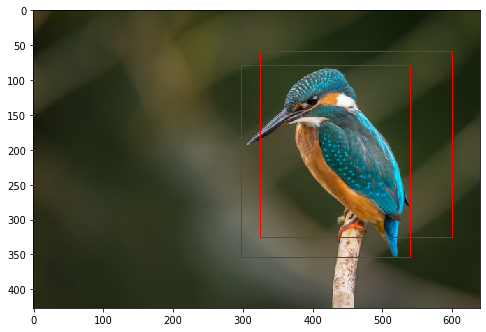

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mp_image
import matplotlib.patches as patches

def plot_bbox(image_np, bbox_list):
    fig, ax = plt.subplots(1)
    fig.set_size_inches(8, 8)

    ax.imshow(image_np)

    for bbox_idx in range(bbox_list.shape[0]):
        x1, y1, x2, y2 = bbox_list[bbox_idx, :].tolist()

        w = x2 - x1
        h = y2 - y1

        rect = patches.Rectangle((x1, y1), w, h,
                                 linewidth=1, 
                                 edgecolor='r', 
                                 facecolor='none')

        ax.add_patch(rect)

    plt.show();

imageBB1 = mp_image.imread('figure2.jpg')

bb1 = [297, 79, 540, 354]
bb2 = [325, 59, 600, 325]

plot_bbox(imageBB1, np.array([bb1, bb2]))

In [ ]:
#trovo il max sulle coord x e y
#trovo il min sulle coord x e y
#se è presente un intersezione, allora faccio
# if (xn1 < xn2) and (yn2 < yn1)
#  calcolo l'area come prodotto
#    - iou_area will be (xn2 - xn1) * (yn2 - yn1)
#else#se nonc'è intersezione, il valore sarà 0:
#      
#l'IoU sarà:
# iou = iou_area/(anchor_box_area + ground_truth_area - iou_area)

In [51]:
anchor_area =(bb1[2]-bb1[0])*(bb1[3]-bb1[1])

inter_x1 = max(bb1[1], bb2[1])
inter_y1 = max(bb1[0], bb2[0])
inter_x2 = min(bb1[3], bb2[3])
inter_y2 = min(bb1[2], bb2[2])
box_area =(bb2[2]-bb2[0])*(bb2[3]-bb2[1])
if (inter_x1 < inter_x2) and (inter_y1 < inter_y2):
    iter_area = (inter_y2 - inter_y1) * (inter_x2 - inter_x1)
    iou = iter_area / (anchor_area + box_area - iter_area)
else:
    iou = 0.
print(iou)

0.6073376586094046
